 scipy.ndimage 
---------------

http://docs.scipy.org/doc/scipy/reference/ndimage.html

In [14]:
%matplotlib inline


import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import scipy.ndimage as ndimage
from random import randint


def bytes_from_file(filename, chunksize=800):
    with open(filename, "rb") as f:
        while True:
            chunk = f.read(chunksize)
            if chunk:
                for b in chunk:
                    yield b
            else:
                break
    
def get_one_imagefrom_mnist():
    filename = "mnist-one-image";
    count = 0;
    image = []
    for b in bytes_from_file(filename):
        if(count<16):
            pass
        else:
            image.append(b)
        count+=1
    return image

          
def smooth():
    image_list = get_one_imagefrom_mnist()
    image_array =np.asarray(image_list)
    image =image_array.reshape(28, 28)
    
    plt.subplot(4, 3, 1) 
    plt.title('original')
    plt.imshow(image, cmap=cm.binary)
    
    for i in range(11):
        img = ndimage.gaussian_filter(image, sigma=float(i/5))
        plt.subplot(4, 3, 2+i)
        plt.title('{0}'.format(float(i/5)))
        plt.imshow(img, cmap=cm.binary)
    plt.show()

def closing():
    image_list = get_one_imagefrom_mnist()
    image_array =np.asarray(image_list)
    image =image_array.reshape(28, 28)
    
    ndimage.binary_closing(image, structure=np.ones((2,2))).astype(int)
    plt.imshow(image, cmap=cm.binary)
    plt.show()

def dilation():
    image_list = get_one_imagefrom_mnist()
    image_array =np.asarray(image_list)
    image =image_array.reshape(28, 28)
    
    ndimage.binary_dilation(image).astype(int)
    plt.imshow(image, cmap=cm.binary)
    plt.show()

def erosion():
    image_list = get_one_imagefrom_mnist()
    image_array =np.asarray(image_list)
    image =image_array.reshape(28, 28)
    
    ndimage.binary_erosion(image).astype(int)
    plt.imshow(image, cmap=cm.binary)
    plt.show()
    
def zoom():
    image_list = get_one_imagefrom_mnist()
    image_array =np.asarray(image_list)
    image =image_array.reshape(28, 28)
    plt.subplot(1, 2, 1) 
    plt.title('original')
    plt.imshow(image, cmap=cm.binary)
    print('original image shape: {0}'.format(image.shape))

    img = ndimage.zoom(image, 0.3)
    plt.subplot(1, 2, 2) 
    plt.title('zoom')
    plt.imshow(img, cmap=cm.binary)
    print('zoomed image shape: {0}'.format(img.shape))
    print(img)
def shift():
    image_list = get_one_imagefrom_mnist()
    image_array =np.asarray(image_list)
    image =image_array.reshape(28, 28)
    
   
    plt.subplot(3, 2, 1) 
    plt.title('original')
    plt.imshow(image, cmap=cm.binary)
        
    for i in range(5):
        image = ndimage.shift(image, (1,i)).astype(int)
        plt.subplot(3, 2, 2+i)
        plt.title('shift')
        plt.imshow(image, cmap=cm.binary)
    plt.show()
    
def shift_direction():
    image_list = get_one_imagefrom_mnist()
    image_array =np.asarray(image_list)
    image =image_array.reshape(28, 28)
    
   
    plt.subplot(3, 2, 1) 
    plt.title('original')
    plt.imshow(image, cmap=cm.binary)
    x_direction = randint(-1,1)
    y_direction = randint(-1,1)
    for i in range(5):
        image = ndimage.shift(image, (x_direction,y_direction)).astype(int)
        plt.subplot(3, 2, 2+i)
        plt.title('{0},{1}'.format(x_direction,y_direction))
        plt.imshow(image, cmap=cm.binary)
    plt.show()

    
def rotate():
    image_list = get_one_imagefrom_mnist()
    image_array =np.asarray(image_list)
    image =image_array.reshape(28, 28)
    
    plt.subplot(4, 3, 1) 
    plt.title('original')
    plt.imshow(image, cmap=cm.binary)
    
    for i in range(11):
        img = ndimage.rotate(image, i*3)
        img = img_value_to_ubyte(img)
        plt.subplot(4, 3, 2+i)
        plt.title('{0}'.format(float(i/5)))
        plt.imshow(img, cmap=cm.binary)
    plt.show()
    
def rotate_direction():
    image_list = get_one_imagefrom_mnist()
    image_array =np.asarray(image_list)
    image =image_array.reshape(28, 28)
    
    plt.subplot(4, 3, 1) 
    plt.title('original')
    plt.imshow(image, cmap=cm.binary)
    #direction = float(randint(-314,314)/1200)
    direction = float(-30)
    for i in range(11):
        img = ndimage.rotate(image, direction, reshape=False)
        print(img.shape)
        plt.subplot(4, 3, 2+i)
        plt.title('{0}'.format(direction))
        plt.imshow(img, cmap=cm.binary)
    plt.show()

def img_value_to_ubyte(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(img[i][j]<0):
                img[i][j]=0
            if(img[i][j]>255):
                img[i][j]=255
    return img


# Image smooth


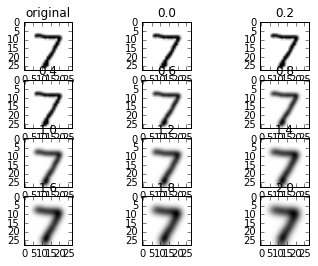

In [14]:
smooth()

# Image shift

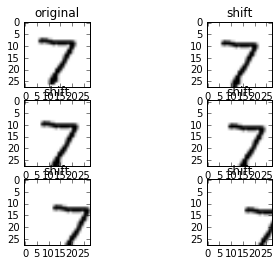

In [18]:
shift()

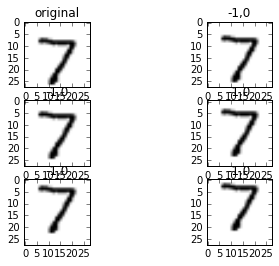

In [16]:
shift_direction()

# Image rotate

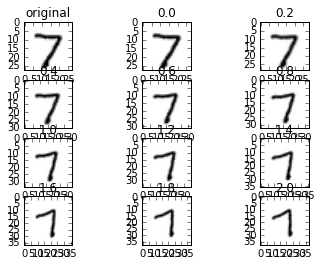

In [15]:
rotate()

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


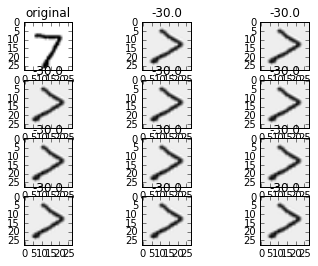

In [32]:
rotate_direction()

# Image zoom

original image shape: (28, 28)
zoomed image shape: (8, 8)
[[  0   0   0   0   0   0   0   0]
 [  0   0  -1   0   0   0   0   0]
 [  0   4 257 156 138 141   0   0]
 [  0   0   1   0   2 234   0   0]
 [  0   0   0   0  56  -8   0   0]
 [  0   0   0  -1 208  -1   0   0]
 [  0   0  -1 219   1   0   0   0]
 [  0   0   0   0   0   0   0   0]]


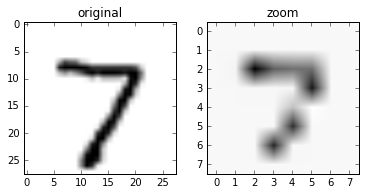

In [7]:
zoom()

original image shape: (28, 28)
zoomed image shape: (8, 8)
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   4 255 156 138 141   0   0]
 [  0   0   1   0   2 234   0   0]
 [  0   0   0   0  56   0   0   0]
 [  0   0   0   0 208   0   0   0]
 [  0   0   0 219   1   0   0   0]
 [  0   0   0   0   0   0   0   0]]


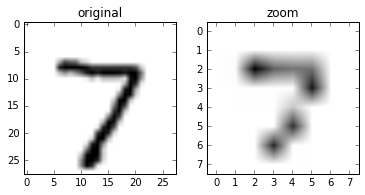

In [12]:

image_list = get_one_imagefrom_mnist()
image_array =np.asarray(image_list)
image =image_array.reshape(28, 28)
plt.subplot(1, 2, 1) 
plt.title('original')
plt.imshow(image, cmap=cm.binary)
print('original image shape: {0}'.format(image.shape))

img = ndimage.zoom(image, 0.3)
img = img_value_to_ubyte(img)
plt.subplot(1, 2, 2) 
plt.title('zoom')
plt.imshow(img, cmap=cm.binary)
print('zoomed image shape: {0}'.format(img.shape))
print(img)

